In [63]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.colors as mcolors

In [64]:
seed = 42

# Homework 4

## 1 The Bias Variance Trade-off

### 1.1 Theoretical Decomposition of the Mean Squared Error

done on paper

### 1.2 Practical Demonstration of the Bias-Variance Trade-Off

read and done

## 2 Polynomial Kernel SVM

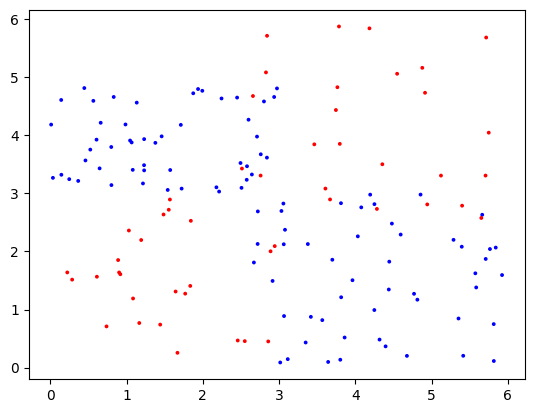

In [65]:
# 1. Load the data
datapoints = np.load('svm_data_3.npy')
X, Y, label = datapoints[:,0], datapoints[:,1], datapoints[:,2]

plt.scatter(X,Y,3, label, cmap='bwr')
plt.show()

In [114]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    datapoints[:,:2], 
    datapoints[:,2], 
    test_size=0.2, 
    random_state=seed,
    )
print(X_train.shape, X_test.shape, y_train.shape, Y_test.shape)

(120, 2) (30, 2) (120,) (30,)


In [115]:
# 2. Train the SVM
grid = {
    'C': [1, 1.5, 2, 2.5], 
    'gamma': [0.2, 0.1, 'scale'],
    'kernel': ['poly'],
    'degree': [2, 3, 4, 5],
    'coef0': [0, 1, 2, 3],
} 

clf = GridSearchCV(SVC(), grid, n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.score(X_test, y_test))

{'C': 1, 'coef0': 1, 'degree': 5, 'gamma': 0.1, 'kernel': 'poly'}
0.9333333333333333


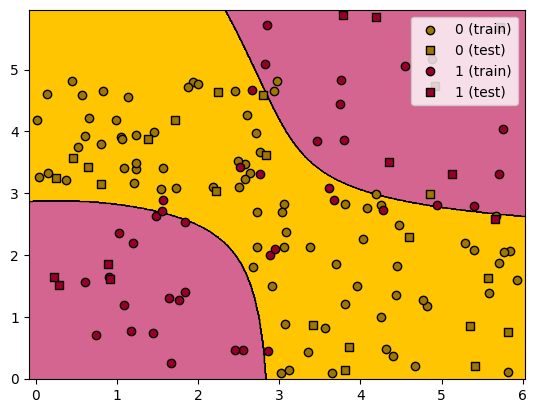

In [119]:
# plot the decision boundary
dark_cmap = mcolors.ListedColormap(["#9E7702", "#980026"])
light_cmap = mcolors.ListedColormap(["#FFC500", "#D46591"])

w0_values = np.arange( X.min() - 0.1, X.max() + 0.1, 0.01)
w1_values = np.arange( Y.min() - 0.1, Y.max() + 0.1, 0.01)
W0, W1 = np.meshgrid(w0_values, w1_values)
grid = np.c_[W0.ravel(), W1.ravel()]
Z = clf.predict(grid).reshape(W0.shape)

plt.contourf(W0, W1, Z, cmap=light_cmap, levels=[-1, 0, 1])
plt.contour(W0, W1, Z, colors='black', linewidths=0.5)

for target in range(2):
    plt.scatter(*X_train[y_train == target].T, color=dark_cmap(target), label=f"{target} (train)", edgecolors='black', zorder=2, marker='o')
    plt.scatter(*X_test[y_test == target].T, color=dark_cmap(target), label=f"{target} (test)", edgecolors='black', zorder=2, marker='s')
plt.legend()
plt.show()